# TITANIC SURVIVAL PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
df=df.drop(['Cabin'],axis=1)

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


<Axes: xlabel='Survived', ylabel='count'>

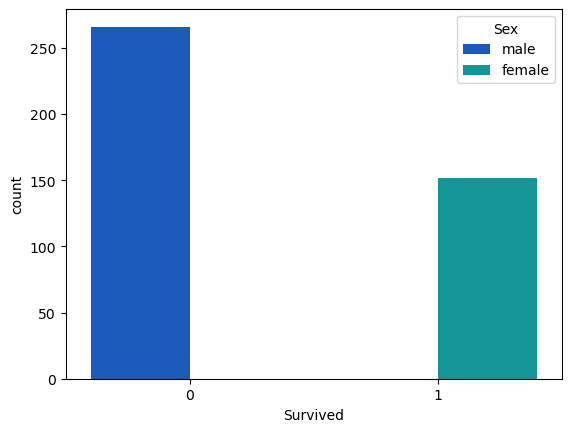

In [7]:
import seaborn as sns
sns.countplot(data = df, x = "Survived", hue = 'Sex',palette = 'winter')

<Axes: xlabel='Survived', ylabel='count'>

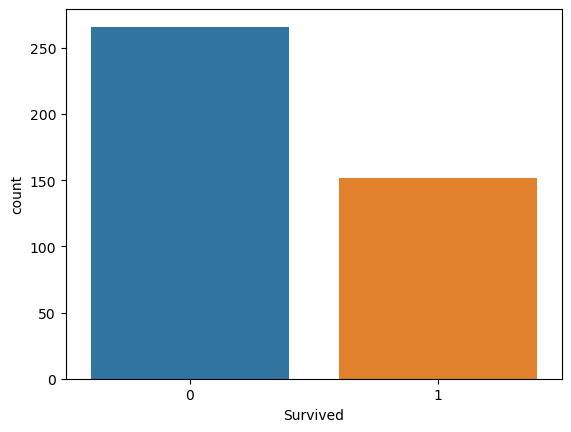

In [8]:
sns.countplot(data = df, x = 'Survived')

<Axes: xlabel='Survived', ylabel='count'>

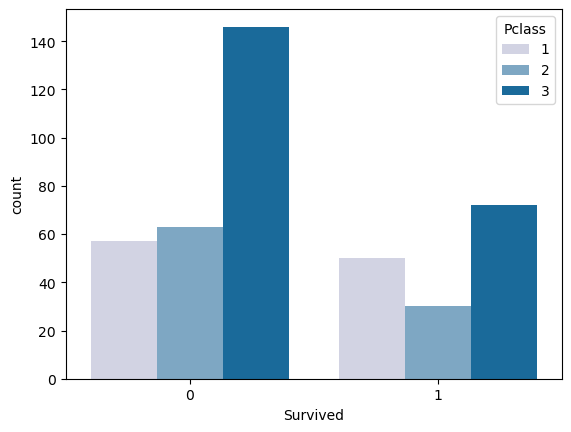

In [9]:
sns.countplot(data = df, x = "Survived", hue = 'Pclass',palette = 'PuBu')

<Axes: ylabel='Frequency'>

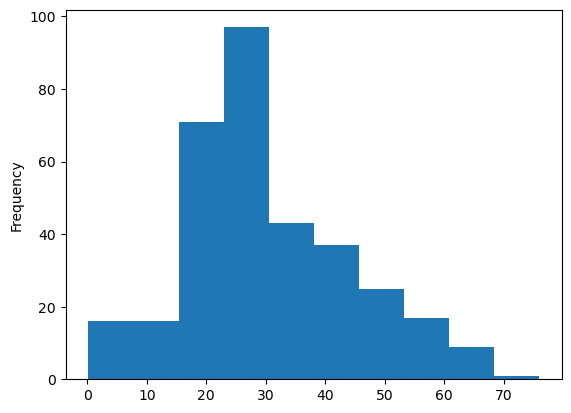

In [10]:
df['Age'].plot.hist()

<Axes: ylabel='Frequency'>

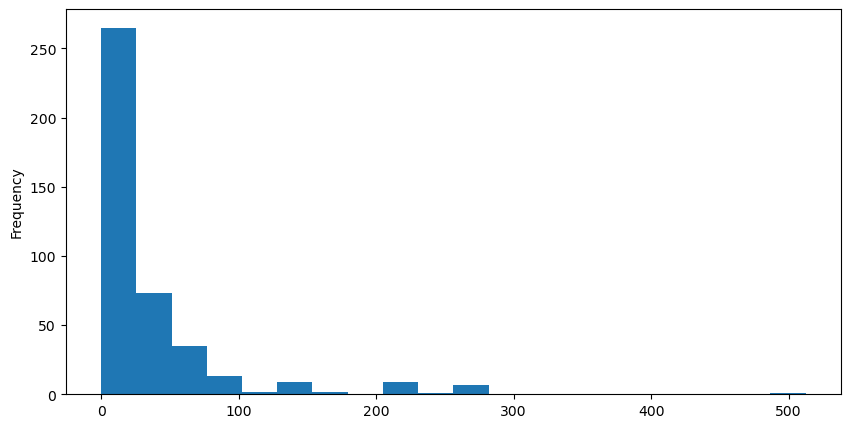

In [11]:
df['Fare'].plot.hist(bins = 20, figsize = (10,5))

<Axes: xlabel='SibSp', ylabel='count'>

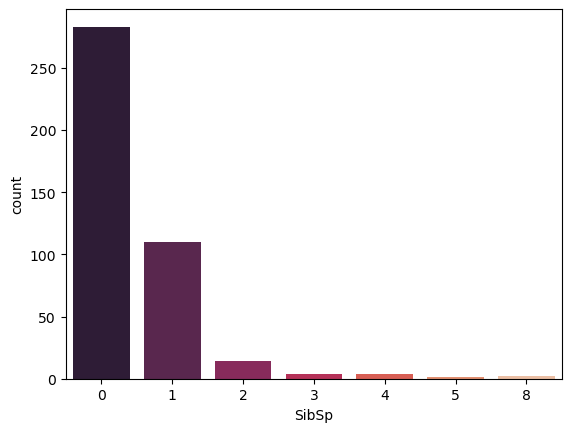

In [12]:
sns.countplot(data = df, x = 'SibSp',palette = 'rocket')

<Axes: ylabel='Frequency'>

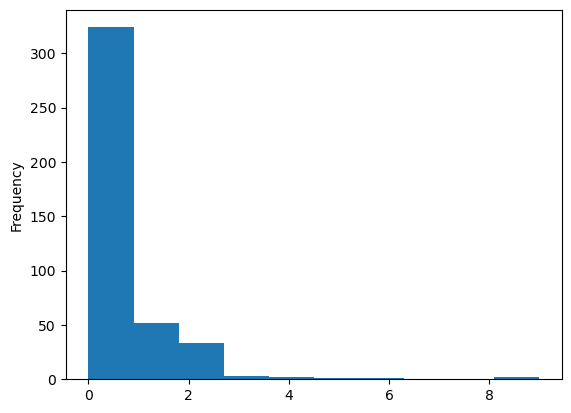

In [13]:
df['Parch'].plot.hist()

<Axes: xlabel='Parch', ylabel='count'>

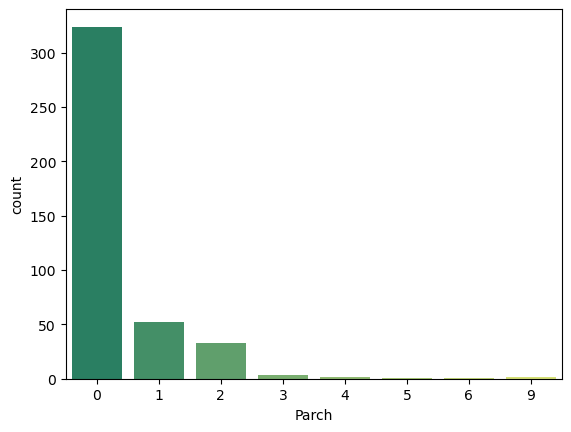

In [14]:
sns.countplot(data = df, x = 'Parch',palette = 'summer')

<Axes: >

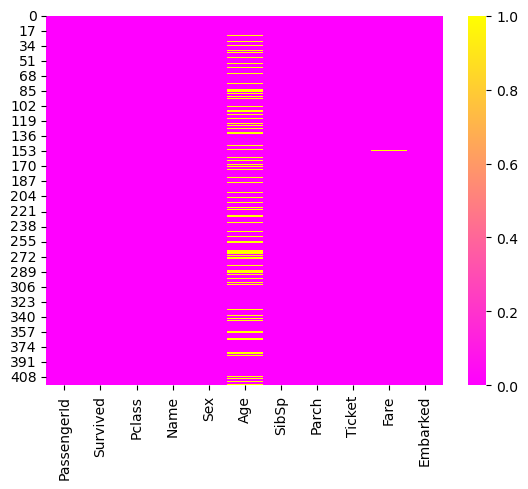

In [15]:
sns.heatmap(df.isnull(), cmap = 'spring')

<Axes: xlabel='Pclass', ylabel='Age'>

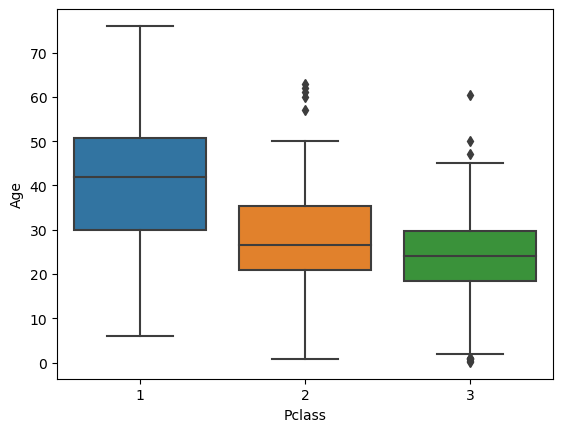

In [16]:
sns.boxplot(x = 'Pclass',y = 'Age',data = df)

In [17]:
impute1=SimpleImputer(strategy="mean")


In [18]:
tr=ColumnTransformer([('impute1',impute1,['Age'])],remainder='passthrough')

In [20]:
ohe = OneHotEncoder()
transformed_sex = ohe.fit_transform(df['Sex'].values.reshape(-1, 1))


In [21]:
data=df.drop(["Name","Sex","Ticket"],axis=1)

In [22]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,34.5,0,0,7.8292,Q
1,893,1,3,47.0,1,0,7.0000,S
2,894,0,2,62.0,0,0,9.6875,Q
3,895,0,3,27.0,0,0,8.6625,S
4,896,1,3,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,0,3,NaN,0,0,8.0500,S
414,1306,1,1,39.0,0,0,108.9000,C
415,1307,0,3,38.5,0,0,7.2500,S
416,1308,0,3,NaN,0,0,8.0500,S


In [23]:
data_new = pd.concat([data, pd.DataFrame(transformed_sex.toarray(), columns=ohe.get_feature_names_out(['Sex']))], axis=1)

In [24]:
data_new=data_new.drop('Sex_female',axis=1)

In [25]:
data_new

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,892,0,3,34.5,0,0,7.8292,Q,1.0
1,893,1,3,47.0,1,0,7.0000,S,0.0
2,894,0,2,62.0,0,0,9.6875,Q,1.0
3,895,0,3,27.0,0,0,8.6625,S,1.0
4,896,1,3,22.0,1,1,12.2875,S,0.0
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,NaN,0,0,8.0500,S,1.0
414,1306,1,1,39.0,0,0,108.9000,C,0.0
415,1307,0,3,38.5,0,0,7.2500,S,1.0
416,1308,0,3,NaN,0,0,8.0500,S,1.0


In [26]:
transformed_Embark = ohe.fit_transform(data['Embarked'].values.reshape(-1, 1))

In [27]:
transform=pd.DataFrame(transformed_Embark.toarray(),columns=ohe.get_feature_names_out(['Embarked']))

In [28]:
transform=transform.drop('Embarked_C',axis=1)

In [29]:
transform

,Embarked_Q,Embarked_S
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
413,0.0,1.0
414,0.0,0.0
415,0.0,1.0
416,0.0,1.0


In [30]:
data_new

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,892,0,3,34.5,0,0,7.8292,Q,1.0
1,893,1,3,47.0,1,0,7.0000,S,0.0
2,894,0,2,62.0,0,0,9.6875,Q,1.0
3,895,0,3,27.0,0,0,8.6625,S,1.0
4,896,1,3,22.0,1,1,12.2875,S,0.0
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,NaN,0,0,8.0500,S,1.0
414,1306,1,1,39.0,0,0,108.9000,C,0.0
415,1307,0,3,38.5,0,0,7.2500,S,1.0
416,1308,0,3,NaN,0,0,8.0500,S,1.0


In [31]:
data_new1 = pd.concat([transform, data_new.drop("Embarked", axis=1)], axis=1)


In [32]:
data_new1

,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,1.0,0.0,892,0,3,34.5,0,0,7.8292,1.0
1,0.0,1.0,893,1,3,47.0,1,0,7.0000,0.0
2,1.0,0.0,894,0,2,62.0,0,0,9.6875,1.0
3,0.0,1.0,895,0,3,27.0,0,0,8.6625,1.0
4,0.0,1.0,896,1,3,22.0,1,1,12.2875,0.0
...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,1305,0,3,NaN,0,0,8.0500,1.0
414,0.0,0.0,1306,1,1,39.0,0,0,108.9000,0.0
415,0.0,1.0,1307,0,3,38.5,0,0,7.2500,1.0
416,0.0,1.0,1308,0,3,NaN,0,0,8.0500,1.0


In [33]:
sc1 = MinMaxScaler(feature_range=(0, 1))
data_new1['Fare'] = sc1.fit_transform(data_new1[['Fare']])

In [34]:
data_new1

,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,1.0,0.0,892,0,3,34.5,0,0,0.015282,1.0
1,0.0,1.0,893,1,3,47.0,1,0,0.013663,0.0
2,1.0,0.0,894,0,2,62.0,0,0,0.018909,1.0
3,0.0,1.0,895,0,3,27.0,0,0,0.016908,1.0
4,0.0,1.0,896,1,3,22.0,1,1,0.023984,0.0
...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,1305,0,3,NaN,0,0,0.015713,1.0
414,0.0,0.0,1306,1,1,39.0,0,0,0.212559,0.0
415,0.0,1.0,1307,0,3,38.5,0,0,0.014151,1.0
416,0.0,1.0,1308,0,3,NaN,0,0,0.015713,1.0


In [35]:
Age_mean=data_new1['Age'].mean()

In [36]:
data_new1["Age"]=data_new1['Age'].fillna(Age_mean)

In [37]:
data_new1

,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,1.0,0.0,892,0,3,34.50000,0,0,0.015282,1.0
1,0.0,1.0,893,1,3,47.00000,1,0,0.013663,0.0
2,1.0,0.0,894,0,2,62.00000,0,0,0.018909,1.0
3,0.0,1.0,895,0,3,27.00000,0,0,0.016908,1.0
4,0.0,1.0,896,1,3,22.00000,1,1,0.023984,0.0
...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,1305,0,3,30.27259,0,0,0.015713,1.0
414,0.0,0.0,1306,1,1,39.00000,0,0,0.212559,0.0
415,0.0,1.0,1307,0,3,38.50000,0,0,0.014151,1.0
416,0.0,1.0,1308,0,3,30.27259,0,0,0.015713,1.0


In [38]:
data_new1=data_new1.dropna()

In [39]:
X_train,X_test,y_train,y_test=train_test_split(data_new1.drop("Survived",axis=1),data_new1['Survived'],test_size=0.3)

In [40]:
clf1=LogisticRegression()

In [41]:
clf1.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_pred=clf1.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
len(y_test)

126

In [45]:
len(y_pred)

126

In [46]:
len(y_pred)

126

In [47]:
clf1.score(X_train,y_train)

1.0

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [49]:
new_passenger_data = {}
new_passenger_data['Pclass'] = int(input("Enter passenger's class (1, 2, or 3): "))
new_passenger_data['Sex'] = int(input("Enter passenger's gender (0 for female, 1 for male): "))
new_passenger_data['Age'] = float(input("Enter passenger's age: "))
new_passenger_data['SibSp'] = int(input("Enter the number of siblings/spouses aboard: "))
new_passenger_data['Parch'] = int(input("Enter the number of parents/children aboard: "))
new_passenger_data['Fare'] = float(input("Enter passenger's fare: "))
new_passenger_data['Embarked'] = int(input("Enter embarked port (0 for C, 1 for Q, 2 for S): "))

# Preprocess the new passenger data


# Predict survival
prediction = clf1.predict(X_test)
prediction



Enter passenger's class (1, 2, or 3):  3
Enter passenger's gender (0 for female, 1 for male):  0
Enter passenger's age:  45
Enter the number of siblings/spouses aboard:  6
Enter the number of parents/children aboard:  2
Enter passenger's fare:  4.2
Enter embarked port (0 for C, 1 for Q, 2 for S):  2


array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)